In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
import seaborn as sns

In [2]:
data=pd.read_csv("bank-full.csv",sep=';')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.columns
A=['y','age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan','contact','day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']

In [5]:
data2=data[A]

In [6]:
data2

,y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,no,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,no,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,no,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,no,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,no,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,yes,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,yes,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,no,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [7]:
data2=pd.get_dummies(data=data2,columns=['marital','default','housing','loan','poutcome','job','education','month','contact'])

In [8]:
data2

,y,age,balance,day,duration,campaign,pdays,previous,marital_divorced,marital_married,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown
0,no,58,2143,5,261,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,no,44,29,5,151,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,no,33,2,5,76,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,no,47,1506,5,92,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,no,33,1,5,198,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,51,825,17,977,3,-1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
45207,yes,71,1729,17,456,2,-1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
45208,yes,72,5715,17,1127,5,184,3,0,1,...,0,0,0,0,1,0,0,1,0,0
45209,no,57,668,17,508,4,-1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [9]:
data2.dtypes

y                      object
age                     int64
balance                 int64
day                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
marital_divorced        uint8
marital_married         uint8
marital_single          uint8
default_no              uint8
default_yes             uint8
housing_no              uint8
housing_yes             uint8
loan_no                 uint8
loan_yes                uint8
poutcome_failure        uint8
poutcome_other          uint8
poutcome_success        uint8
poutcome_unknown        uint8
job_admin.              uint8
job_blue-collar         uint8
job_entrepreneur        uint8
job_housemaid           uint8
job_management          uint8
job_retired             uint8
job_self-employed       uint8
job_services            uint8
job_student             uint8
job_technician          uint8
job_unemployed          uint8
job_unknown             uint8
education_

In [10]:
data2.describe()

,age,balance,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.115171,0.601933,0.282896,...,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.647741,0.064276,0.287983
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.319232,0.489505,0.450411,...,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.477680,0.245247,0.452828
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data2["y"] = np.where(data2["y"].str.contains("yes"), 1,0)

In [12]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [13]:
data2

,y,age,balance,day,duration,campaign,pdays,previous,marital_divorced,marital_married,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown
0,0,58,2143,5,261,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,44,29,5,151,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,33,2,5,76,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0,47,1506,5,92,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,33,1,5,198,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,51,825,17,977,3,-1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
45207,1,71,1729,17,456,2,-1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
45208,1,72,5715,17,1127,5,184,3,0,1,...,0,0,0,0,1,0,0,1,0,0
45209,0,57,668,17,508,4,-1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [14]:
data.groupby(['pdays']).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
pdays,,,,,,,,,,,,,,,,
-1,36954,36954,36954,36954,36954,36954,36954,36954,36954,36954,36954,36954,36954,36954,36954,36954
1,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
842,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
850,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [15]:
x=data2.iloc[:,1:]

In [16]:
y=data2['y']

logistic Regression

In [17]:
model=LogisticRegression(max_iter=300)
model.fit(x,y)

C:\Users\MRITYUNJAY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [18]:
Y_prep=model.predict(x)

In [19]:
print(Y_prep[np.where(Y_prep==1)].shape)
print(y[y==1].shape)

(2211,)
(5289,)


In [20]:
Y_pred_df=pd.DataFrame({'actual':y,
                        'predicted_prob':model.predict(x)})

In [21]:
Y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [22]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,Y_prep)
print (confusion_matrix)

[[39067   855]
 [ 3933  1356]]


In [23]:
(confusion_matrix[0,0]+confusion_matrix[1,1])/(confusion_matrix.sum())
#0.89044
#0.89179

0.8940965694189467

In [24]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,Y_prep))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.61      0.26      0.36      5289

    accuracy                           0.89     45211
   macro avg       0.76      0.62      0.65     45211
weighted avg       0.87      0.89      0.87     45211



In [25]:
model.predict_proba (x)[:,1]

array([0.0229592 , 0.01385267, 0.00959698, ..., 0.90906811, 0.13058134,
       0.55883157])

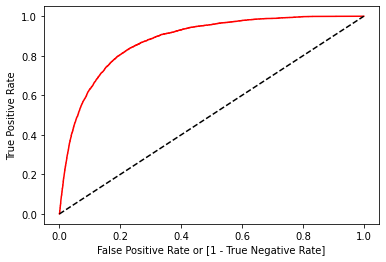

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, model.predict_proba (x)[:,1])

auc = roc_auc_score(y, Y_prep)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()


In [27]:
auc

0.6174822028878036